# Demo: Multi-Class Classification
We're using the IRIS dataset, a classic machine learning dataset that illustrates both linearly separable and non-linearly separable classes.

3 different types of irises’ (Setosa, Versicolour, and Virginica). There are 4 features in the dataset: sepal length, sepal width, petal length, petal width.

This dataset is so famous it even has a [Wikipedia page](https://en.wikipedia.org/wiki/Iris_flower_data_set).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width=200 />
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg" width=200 />
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/440px-Iris_virginica.jpg" width=200 />

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets


# Loading the dataset
iris = datasets.load_iris()
X = iris.data[:,:2] # using only first two features (sepal length, sepal width)
y = iris.target

(num_samples, num_features) = X.shape
print("num_samples, num_features =", X.shape)

num_samples, num_features = (150, 2)


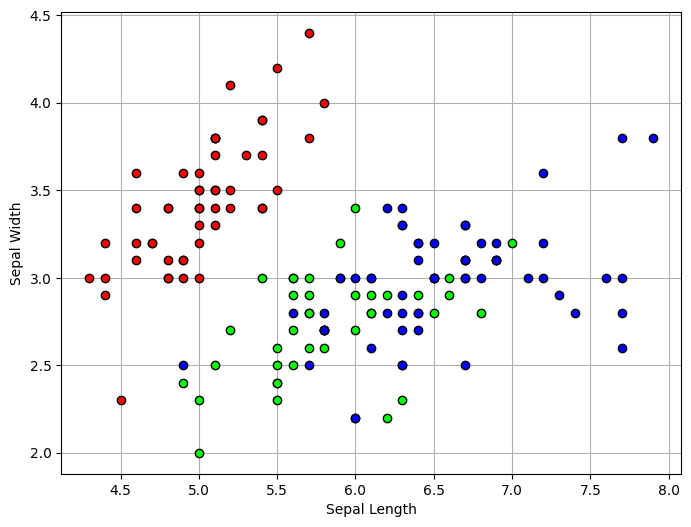

In [2]:
# y==0 picks the indicies corresponding to y equal zero
plt.figure(figsize=(8,6))
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(X[y==0,0], X[y==0,1], 'o', markerfacecolor=(1,0,0,1), markeredgecolor='black')
plt.plot(X[y==1,0], X[y==1,1], 'o', markerfacecolor=(0,1,0,1), markeredgecolor='black')
plt.plot(X[y==2,0], X[y==2,1], 'o', markerfacecolor=(0,0,1,1), markeredgecolor='black')
# remember this a 3-class classification problem!

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()

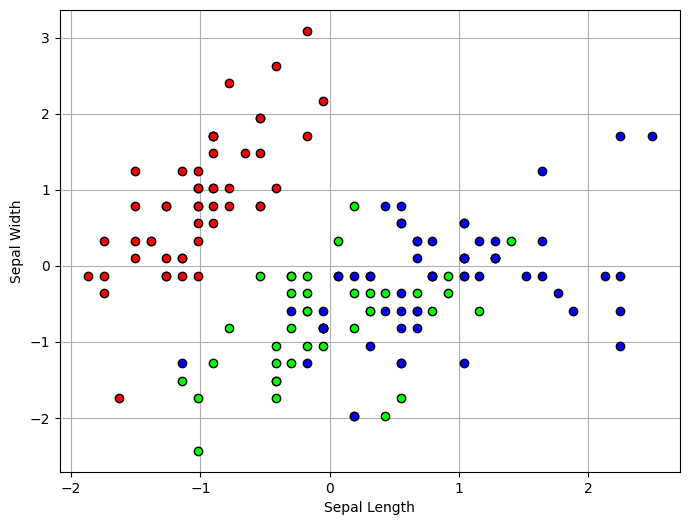

In [3]:
from sklearn import preprocessing

# normalizing the data
Xs = preprocessing.scale(X)

# Plot it again and compare it with the data before normalization
plt.figure(figsize=(8,6))
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot(Xs[y==0,0], Xs[y==0,1], 'o', markerfacecolor=(1,0,0,1), markeredgecolor='black')
plt.plot(Xs[y==1,0], Xs[y==1,1], 'o', markerfacecolor=(0,1,0,1), markeredgecolor='black')
plt.plot(Xs[y==2,0], Xs[y==2,1], 'o', markerfacecolor=(0,0,1,1), markeredgecolor='black');

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width');
plt.grid()

#### Split data into train and test dataset
Import model_selection from sklearn.

Use the `sklearn.model_selection` module to split your data. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [11]:
from sklearn.model_selection import train_test_split
# TODO
# split the data into test and train (use 50% of the data as test set)
# We're not using ANY hyperparameters --- NO NEED FOR VALIDATION SET
X_train, X_test, y_train, y_test = train_test_split(Xs, y, train_size=0.5, random_state=10)

#### Fit a Logistic Model

Import linear_model from sklearn.

Use the `sklearn.linear_model` module to create a `LogisticRegression`.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Fit the model with training dataset.

In [12]:
from sklearn.linear_model import LogisticRegression
# TODO
# create logistic regression object
reg = LogisticRegression()

# fit the model on the training data ONLY
reg.fit(X_train, y_train)

LogisticRegression()

Find the training and test accuracy of the model.

In [21]:
# TODO
# HINT: use np.mean(y == y_pred)
yHat_train = reg.predict(X_train)
train_acc = np.mean(y_train == yHat_train)

yHat_test = reg.predict(X_train)
test_acc = np.mean(y_test == yHat_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.8266666666666667
Test Accuracy: 0.2


## Decision Boundary
[Code for plotting decission boundary](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

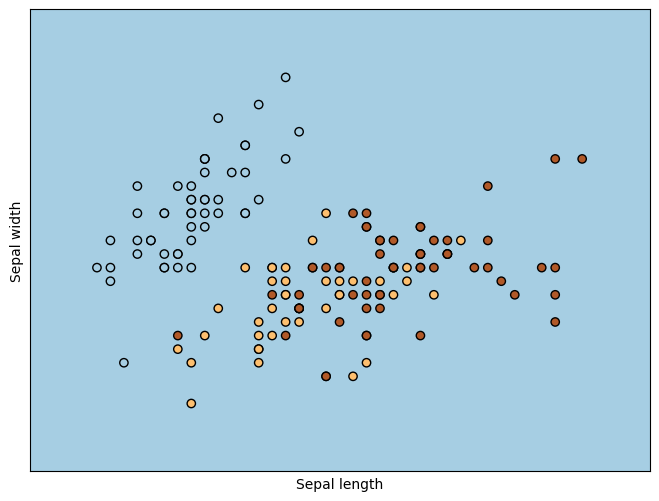

In [24]:
### CODE FROM SKLEARN IRIS DEMO ###

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.figure(figsize=(8,6))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Understanding The Classifications

### Class confidence outputs
In our print statement, the first column is our decision, cols 2-4 are our class proability outputs.

In [16]:
# showing the probabilities

# TODO
# get the prediction probabilties for each class (test data)
# use the function predict_proba (look at the documentation)
yhat_probs_test = reg.predict_proba(X_test)

In [22]:
np.set_printoptions(precision=2, suppress=True)

print(yHat_test.shape, yhat_probs_test.shape)
# [class, prob_of_class_1, prob_of_class_2, prob_of_class_3]
print(np.hstack([yHat_test.reshape(-1,1), yhat_probs_test]))

(75,) (75, 3)
[[2.   0.   0.57 0.43]
 [0.   0.   0.44 0.56]
 [1.   0.95 0.03 0.02]
 [2.   0.05 0.45 0.51]
 [1.   0.91 0.07 0.02]
 [0.   0.01 0.9  0.09]
 [2.   0.   0.52 0.48]
 [2.   0.03 0.62 0.35]
 [1.   0.92 0.05 0.02]
 [0.   0.07 0.6  0.33]
 [0.   0.23 0.49 0.29]
 [0.   0.03 0.62 0.35]
 [1.   0.01 0.78 0.21]
 [2.   0.75 0.21 0.05]
 [2.   0.99 0.01 0.  ]
 [2.   0.   0.26 0.74]
 [0.   0.34 0.27 0.39]
 [0.   0.93 0.06 0.01]
 [0.   0.98 0.01 0.01]
 [2.   0.86 0.11 0.03]
 [1.   0.   0.19 0.81]
 [1.   0.01 0.42 0.58]
 [1.   0.01 0.48 0.51]
 [2.   0.97 0.02 0.01]
 [2.   0.09 0.48 0.42]
 [1.   0.94 0.05 0.01]
 [1.   0.17 0.5  0.33]
 [2.   0.05 0.7  0.25]
 [0.   0.   0.3  0.7 ]
 [0.   0.   0.05 0.95]
 [1.   0.   0.33 0.66]
 [0.   0.02 0.45 0.53]
 [0.   0.   0.17 0.83]
 [2.   0.05 0.58 0.37]
 [1.   0.   0.52 0.48]
 [0.   0.96 0.04 0.01]
 [0.   0.02 0.23 0.75]
 [0.   0.01 0.2  0.79]
 [1.   0.   0.14 0.86]
 [0.   0.   0.22 0.78]
 [2.   0.94 0.04 0.02]
 [0.   0.97 0.02 0.01]
 [1.   0.19 0.64 0.1